In [1]:
import numpy as np

# representing a dataset with four rows and four columns. Each row corresponds to a data point, and each column represents a feature.
X = np.array([[0, 1, 0, 1],
              [1, 0, 1, 1],
              [0, 0, 0, 1],
              [1, 0, 1, 0]])

# represents the class for each data points
y = np.array([0, 1, 0, 1])

# Initialize an empty dictionary to store counts
counts = {}

# Loop over each unique class label
for label in np.unique(y):
    # Select rows of X where y matches the current class label
    selected_rows = X[y == label]
    
    # Sum the entries of 1 for each feature along the rows
    feature_counts = selected_rows.sum(axis=0)
    
    # Store the feature counts in the dictionary
    counts[label] = feature_counts

# Print the feature counts for each class
print("Feature counts:\n{}".format(counts))

Feature counts:
{0: array([0, 1, 0, 2]), 1: array([2, 0, 2, 1])}


In [2]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# Load the breast cancer dataset
cancer = load_breast_cancer()

# Split the data into training and test sets, ensuring balanced classes using stratify
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42)

# Create a DecisionTreeClassifier with default settings (no depth restriction)
tree = DecisionTreeClassifier(random_state=0)

# Train the model on the training data
tree.fit(X_train, y_train)

# Print accuracy on the training and test sets
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

# Apply pre-pruning by limiting the max depth of the tree to 4
tree = DecisionTreeClassifier(max_depth=4, random_state=0)

# Train the pruned model on the training data
tree.fit(X_train, y_train)

# Print accuracy on the training and test sets for the pruned tree
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))


Accuracy on training set: 1.000
Accuracy on test set: 0.937
Accuracy on training set: 0.988
Accuracy on test set: 0.951


In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz

# Load the breast cancer dataset as an example
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target

# Create and fit a decision tree classifier
tree = DecisionTreeClassifier(max_depth=3)  # You can adjust the depth as needed
tree.fit(X, y)

# Export the decision tree visualization to a DOT file
export_graphviz(tree, out_file="tree.dot",
                class_names=["malignant", "benign"],
                feature_names=cancer.feature_names,
                impurity=False, filled=True)

# Read the DOT file and visualize the tree using Graphviz
with open("tree.dot") as f:
    dot_graph = f.read()
graph = graphviz.Source(dot_graph)
graph.render("decision_tree", format="png")  # Optionally save the visualization as an image
graph.view()  # Display the visualization

'decision_tree.pdf'

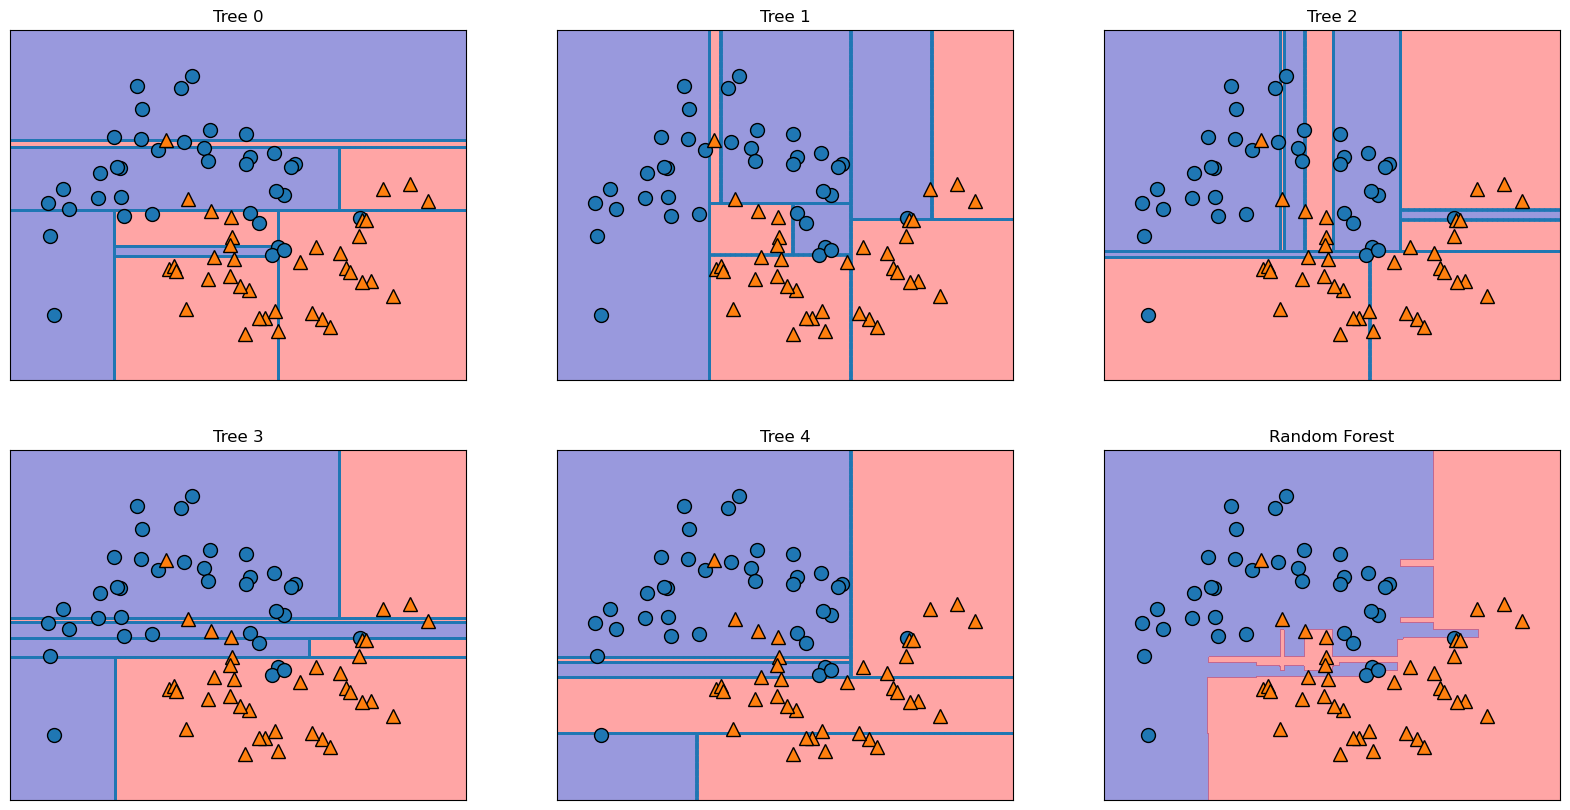

In [2]:
import matplotlib.pyplot as plt
import mglearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

# Create the "two_moons" dataset
X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

# Create a random forest with 5 trees
forest = RandomForestClassifier(n_estimators=5, random_state=2)
forest.fit(X_train, y_train)

# Visualize the decision boundaries
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    ax.set_title("Tree {}".format(i))
    mglearn.plots.plot_tree_partition(X_train, y_train, tree, ax=ax)
    
mglearn.plots.plot_2d_separator(forest, X_train, fill=True, ax=axes[-1, -1], alpha=.4)
axes[-1, -1].set_title("Random Forest")
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)

# Display the plot
plt.show()